# Simple Regression Task

This is the complete file for the _TensorFlow: The Basics_ workshop.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

/Users/noelkonagai/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Creating the data

In [2]:
x_data = np.linspace(0.0, 10.0, 1000000)
noise = np.random.randn(len(x_data))
b = 5

y_true = (0.5 * x_data ) + b + noise

# and now create a pandas dataframe out of it
my_data = pd.concat([pd.DataFrame(data=x_data,columns=['x']),pd.DataFrame(data=y_true,columns=['y'])],axis=1)

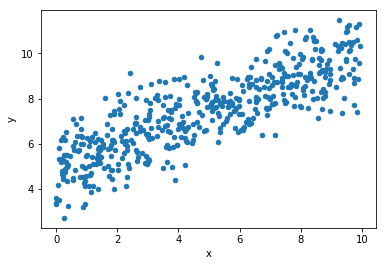

In [3]:
my_data.sample(n=500).plot(kind='scatter',x='x',y='y')

## Setting up the model

Creating variables, placeholders, the graph ```y_model```, the error function (also called loss function), and the optimizer.

In [6]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

batch_size = 10 

x_placeholder = tf.placeholder(tf.float32, [batch_size])
y_placeholder = tf.placeholder(tf.float32, [batch_size])

y_model = m * x_placeholder + b

error = tf.reduce_sum( tf.square( y_placeholder - y_model ))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)

In [7]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data), size = batch_size)
        
        feed = { x_placeholder : x_data[rand_ind], y_placeholder : y_true[rand_ind] }
        
        sess.run(train,feed_dict=feed)
        
    model_m, model_b = sess.run([m,b])

In [8]:
print(model_m, model_b)

0.504832 4.97819


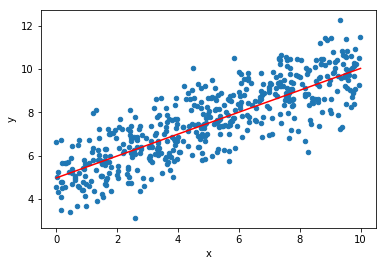

In [9]:
y_hat = x_data * model_m + model_b

my_data.sample(n=500).plot(kind='scatter',x='x',y='y')
plt.plot(x_data, y_hat,'r')